In [1]:
import pandas as pd

train_labels_csv = "./data/train_labels.csv"
train_labels_df = pd.read_csv(train_labels_csv)
train_labels_df.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In the CSV file, there is only information of the image ID and the label for that image. A label indicates if the center 32x32 region of the image contains at least one pixel of tumor tissue or not. '0' means no tumor, '1' means tumor is present.

In [35]:
print(train_labels_df['label'].value_counts())
total = train_labels_df['label'].count()
print(f"percent of '0': {round(train_labels_df[train_labels_df['label']==0]['label'].count()/total,4)*100}%")
print(f"percent of '1': {round(train_labels_df[train_labels_df['label']==1]['label'].count()/total,4)*100}%")

0    130908
1     89117
Name: label, dtype: int64
percent of '0': 59.5%
percent of '1': 40.5%


<AxesSubplot:>

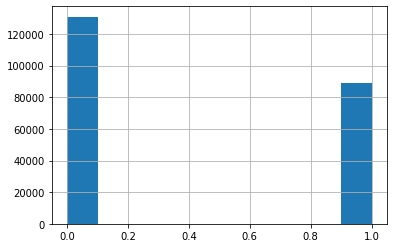

In [3]:
%matplotlib inline
train_labels_df['label'].hist()


# Visualizing image

In [4]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import os

%matplotlib inline

In [6]:
malignantIds = train_labels_df.loc[train_labels_df['label'] ==1]['id'].values
malignantIds

array(['c18f2d887b7ae4f6742ee445113fa1aef383ed77',
       'a24ce148f6ffa7ef8eefb4efb12ebffe8dd700da',
       '7f6ccae485af121e0b6ee733022e226ee6b0c65f', ...,
       '309210db7f424edbc22b2d13bf2fa27518b18f5c',
       'd4b854fe38b07fe2831ad73892b3cec877689576',
       'a81f84895ddcd522302ddf34be02eb1b3e5af1cb'], dtype=object)

In [15]:
train_data_path = "./data/train"
color = True

In [16]:
plt.rcParams['figure.figsize'] = (10,10)
plt.subplots_adjust(wspace=0, hspace=0)
nrows, ncols = 3,3

<Figure size 720x720 with 0 Axes>

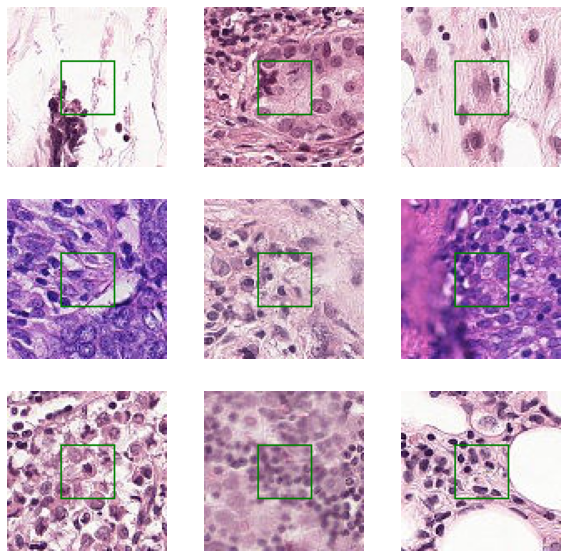

In [17]:
for i, id_ in enumerate(malignantIds[:nrows*ncols]):
    full_filename = os.path.join(train_data_path, id_ +'.tif')

    # load image
    img = Image.open(full_filename)

    # draw a 32x32 rectangle
    draw = ImageDraw.Draw(img)
    draw.rectangle(((32,32), (64,64)), outline='green')
    plt.subplot(nrows, ncols, i+1)
    if color is True:
        plt.imshow(np.array(img))
    else:
        plt.imshow(np.array(img)[:,:,0], cmap='gray')
    plt.axis('off')


In [18]:
print("image shape:", np.array(img).shape)
print(f"pixel values range from {np.min(img)} to {np.max(img)}")

image shape: (96, 96, 3)
pixel values range from 0 to 255
